# Welcome to "Hello World with pytket" using a Jupyter notebook for beginners

References:<br>
[1] "Developing and Executing Error-Mitigated NISQ Algorithms Across Devices and Simulators" by **Dan Mills**, Melf Johannsen, Silas Dilkes - Cambridge Quantum 
https://github.com/CQCL/EQTC-TKET-TUTORIAL/blob/main/tutorial-part-1-dan.ipynb<br>
[2] "[Introduction Introduction to Classical and Quantum Computing](https://www.thomaswong.net/)" by Dr. Thomas G. Wong

[Pytket](https://cqcl.github.io/tket/pytket/api/index.html) is a python toolkit for quantum programming developed by Cambridge Quantum Computing, an extension of their larger TKET toolchain. TKET encompasses the entire toolset of high-performance tools for quantum programming, mostly written in C++. Hence, pytket is a Python interface to TKET, which is a platform-agnostic quantum software development kit (QSDK),

Here, I present a little guide that should get you started quickly in pytket for building and simplifying quantum programs in a Jupyter notebook. A Jupiter notebook is basically a way for us to run code interactively within a web browser. 

Regarding prior knowledge, it is helpful if you have seen and worked with basic quantum wavefunctions before and know how to do matrix multiplication using the concepts of linear algebra. 

If any questions arise please contact me via email.<br>
Kathrin Spendier: kathrin.spendier@quantinuum.com

## "Hello World with pytket" Contents

In this guide I will
1. show you how to get access to Jupyter Notebooks via the Anaconda Navigator
2. show how to install pytket
3. show how you put a qubit into a superposition using the Hadamard Gate
4. show how you measue the circuit and run on the freely accessible IBM simulator (without setting up an IBM Quantum account)

## 1) Jupyter Notebook Installation

Here I am assuming that you are starting from scratch, and don't have access to Python or a Jupyter Notebook yet. <br>
If you do have a provider that allows to execute arbitrary python code, skip the following Steps 0 to 2 in section 1).

### Step 0: The browser
Step “zero” consists in installing a modern standard-compliant browser. Either Mozilla Firefox or Google 
Chrome will work well. Try to avoid MS Explorer.

### Step 1: Installation
The easiest way to install the Jupyter Notebook App is installing a scientific python distribution which 
also includes scientific python packages. The most common distribution is called Anaconda:<br>
https://www.anaconda.com/products/distribution 

Download Anaconda Distribution (a few 100MB), Python 3, 64 bits.<br>
Install it using the default settings for a single user.

### Step 2: open Jupyter Notebook
Open the application Anaconda. You should see the Anaconda Navigator panel open. Most of this stuff we do 
not need.  Click on the Jupyter Notebook panel. What will open is a web browser, which is what Jupyter 
displays on. You should see a file directory displayed. 

To create a new notebook, click on “New” and select “Python 3”

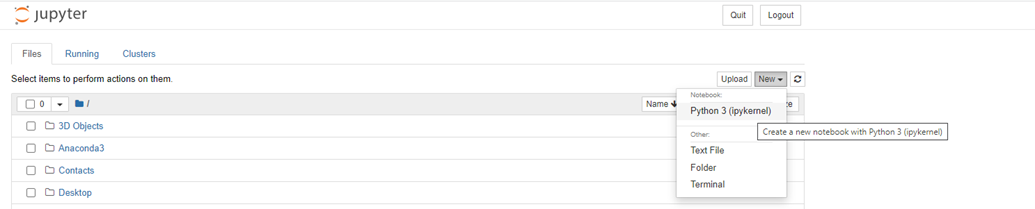

Now you should see:

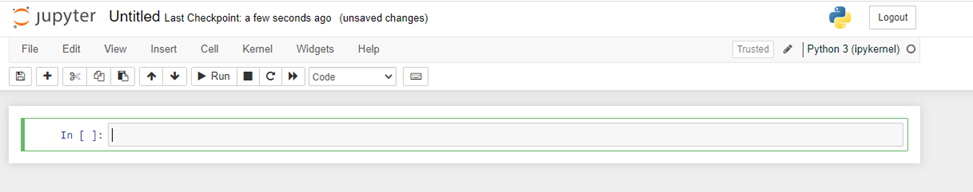

Before we start coding in pytket, I want to point out sometething about cells and formatting in this jupyter notebook. 

There are two different types of cells: "__Markdown__" (text) and "__Code__" (input for programming). <br>
This is a __Markdown__ cell. Actually, all the cells above are Markdown cells.

By pressing SHIFT+ENTER or the "Run" button above we "evaluate" a cell.

## 2) Install pytket

An implementation of tket available in the form of the pytket python package. To install pytket, we run the following "__Code__" cell:

In [18]:
pip install pytket 

Now, we are ready to evalaute our very first quantum gate.

## 3) Creating a qubit superposition using the Hadamard Gate

Qubits are the basic unit of quantum computation and the quantum analog of classical bits. A qubit is represented as a combination of two quantum states of a given basis. There are many different ways to realize qubits: energy level of electrons, photon polarization, spin. For example, the most common basis is the \\( \mathsf{Z} \\)-basis. For this basis the quantum states of the hydrogen atom, for example, are expressed as $\left|0\right>$  for the “ground state” and $\left|1\right>$  for the “excited state”, equivalent to 0 or 1 when translated to classical bits. Qubits can be in any quantum state 

$$
\begin{equation*}
\left| \psi \right\rangle=
\alpha\left|0\right> + \beta\left|1\right>,
\end{equation*}
$$

with $\alpha$ and $\beta$ potentially being complex numbers. When we measure the qubit we get state $\left|0\right>$ with probability $|\alpha|^2$ and state $\left|1\right>$ with probability $|\beta|^2$. 

For a single electron in a hydrogen atom, the wavefunction for a basic 50-50 superposition in its electronic ground state and excited state is written in the form of

\\[ \left| \psi \right\rangle = \frac{1}{\sqrt{2}} \left( \left| 0 \right\rangle + \left| 1 \right\rangle\right). \\]

When we measure this wavefunction, it will (theoretically) provide a result of 0 or 1 with a given probability. Specifically,  if we measure this qubit, such as at the end of a computation in order to read the result, we get a single, definite value. That is, we get $\left|0\right>$ or $\left|1\right>$, each with some probability, not a superposition of $\left|0\right>$ and $\left|1\right>$. Geometrically, this particular qubit lies on the equator, halfway between the north and south poles of the Bloch sphere, so if we measure it, we get $\left|0\right>$ with probability 1/2 or $\left|1\right>$ with probability 1/2. 

In [17]:
pip install qutip ;  #code for representing Bloch sphere representation follows

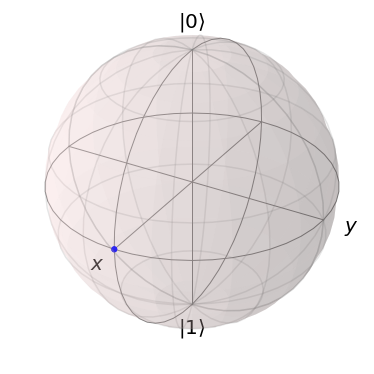

In [3]:
import numpy as np
from pylab import *
from qutip import *

b = qutip.Bloch()
pnt = [1, 0,0]
b.add_points(pnt)

b.show()

A set of distinct measurement outcomes is called a basis, and {$\left|0\right>,\left|1\right>$} is called the \\( \mathsf{Z} \\)-basis because they lie on the z-axis of the Bloch sphere. This is why we introduced $\left|0\right>$ and $\left|1\right>$ as the north and south poles, respectively, of the Bloch sphere.


To calculate these probabilities, we take the norm-square of the coefficient of $\left|0\right>$ or $\left|1\right>$. That is, the probability of getting $\left|0\right>$ (or $\left|1\right>$) is

\\[ \left| \frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2}. \\]


One way to create a qubit in such superposition, is to take a qubit initialized in the “ground state” and then apply the Hadamard gate, or H gate, to it: \\[ \left| \psi \right\rangle = H \left| 0 \right\rangle\\].

Here the H gate corrresponds to the following matrix
$$
\begin{equation*}
H=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}\,\, ,
\end{equation*}
$$
and $\left|0\right>$ and $\left|1\right>$ are column vectors, which are vertical lists of numbers
$$
\begin{equation*}
\left|0\right> =
\begin{pmatrix}
1 \\
0
\end{pmatrix}\,\, ,
\left|1\right> =
\begin{pmatrix}
0 \\
1
\end{pmatrix}\,\,.
\end{equation*}
$$

Following the rules of linear algebra, we can show that we obtain $ \left| \psi \right\rangle = \frac{1}{\sqrt{2}} \left( \left| 0 \right\rangle + \left| 1 \right\rangle\right)$  given that we can write 
$$
\begin{equation*}
\left| \psi \right\rangle=
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}\,\, =
\alpha\left|0\right> + \beta\left|1\right>,
\end{equation*}
$$
with $\alpha = \beta = 1/\sqrt{2}$.




To rewrite this wavefunction in terms of a circuit, i.e. taking a qubit initialized in the “ground state” and then apply the Hadamard gate, we need to first import the "Circuit" tool from tket

In [4]:
from pytket import Circuit

Then to display the circuit we want to evaluate we also need to import

In [5]:
from pytket.circuit.display import render_circuit_jupyter

Then we define our circuit with a single qubit, q[0], and apply the The Hadamard gate to it.

In [6]:
circ = Circuit(1)
circ.H(0)

[H q[0]; ]

At this step, the qubit q[0] is in superposition. We can show a schematic of the corresponding circuit by evaluating

In [7]:
render_circuit_jupyter(circ)

But a real device won't work like this. We cannot observe a full quantum state. We have to make observations and measurments. In fact, we need to sample from a probabilisitic distribution.

## 4)  Measurement

In pytket, all measurements are single-qubit measurements in the \\( \mathsf{Z} \\) basis. Other forms of measurements can be constructed by combining these with other operations. Measurements produce classical data from the resulting state. Here, c[0] is a calssical register, or classical bit, which we obtain after measuring qubit q[0]. c[0] will either be 0 or 1.

In [8]:
circ.measure_all()
render_circuit_jupyter(circ)

Specifically if we would prepare q[0] this way 1000 times and measure q[0], roughly 50% of the 1000 measures provided a 0 and 50% provided a 1, as expected.

To implement such measurments, we now install pytket-qiskit. pytket-qiskit integrates qiskit into pytket, an IBM tool that, among other things, provides access to their quantum computers and numerous simulators. You will thus be able to access all these features directly from pytket.

In [16]:
pip install pytket-qiskit

For this tutorial, we will use the noisless AerSimulator.

In [10]:
from pytket.extensions.qiskit import AerBackend
backend = AerBackend()
#circ.measure_all()   included this command if not implemented earlier

Now, since we have to sample, we have to indicate how many samples we want to take. Let's take 10 samples

We can get some measured shots out from the AerBackend, which is an interface to the Qiskit Aer QASM simulator. Suppose we would like to get 10 shots out (10 repeats of the circuit and measurement). We can seed the simulator's random-number generator in order to make the results reproducible, using an optional keyword argument to process_circuit.

In [11]:
handle = backend.process_circuit(circ, n_shots=10, seed=1)

Now, we can output the shot table

In [12]:
shots = backend.get_result(handle).get_shots()
print(shots)

[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


These are our 10 measuements. The column represent qubit q[0]. We can also get the summary of the results by looking at counts.

In [13]:
counts = backend.get_result(handle).get_counts()
print(counts)

Counter({(0,): 7, (1,): 3})


Or we can plot a histogram of our results.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_counts(counts):
    counts_record = [{"State":state, "Count":count} for state, count in counts.items()]
    count_df = pd.DataFrame().from_records(counts_record)
    sns.catplot(x='State', y='Count', kind='bar', data=count_df, aspect = 3, height=2)
    plt.show()

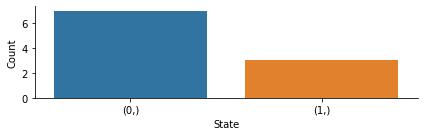

In [15]:
plot_counts(counts)